In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 5.8+ MB


In [5]:
train_data.drop(['id'], axis =1, inplace=True)
ids = test_data['id'].copy()
test_data.drop(['id'], axis =1, inplace=True)

In [6]:
train_data.columns

Index(['gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

In [7]:
train_data.describe()

,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000
mean,0.575488,4.595669,4351.502416,97952.828978
std,0.494272,2.290446,3262.359775,90613.814793
min,0.000000,0.000000,0.000000,24828.000000
25%,0.000000,3.000000,2406.000000,52836.000000
50%,1.000000,5.000000,4089.000000,66396.000000
75%,1.000000,6.000000,6094.000000,103440.000000
max,1.000000,8.000000,31894.000000,724068.000000


In [8]:
new_data = (train_data.claim_amount-train_data.claim_amount.min())/(train_data.claim_amount.max()-train_data.claim_amount.min())
train_data.claim_amount = new_data.copy()

In [9]:
print(train_data.claim_amount.max(), train_data.claim_amount.min())
print(train_data.cltv.max(), train_data.cltv.min())

1.0 0.0
724068 24828


In [10]:
cat_columns = ['gender', 'area', 'qualification', 'income','policy', 'type_of_policy', 'num_policies', 'vintage']
for col  in cat_columns:
    print(col, train_data[col].unique())

gender ['Male' 'Female']
area ['Urban' 'Rural']
qualification ['Bachelor' 'High School' 'Others']
income ['5L-10L' 'More than 10L' '2L-5L' '<=2L']
policy ['A' 'C' 'B']
type_of_policy ['Platinum' 'Gold' 'Silver']
num_policies ['More than 1' '1']
vintage [5 8 7 6 1 0 3 4 2]


In [11]:
cat_columns.remove('vintage')
one_hot_encoded_train_data = pd.get_dummies(train_data,columns=cat_columns)
one_hot_encoded_train_data.columns

Index(['marital_status', 'vintage', 'claim_amount', 'cltv', 'gender_Female',
       'gender_Male', 'area_Rural', 'area_Urban', 'qualification_Bachelor',
       'qualification_High School', 'qualification_Others', 'income_2L-5L',
       'income_5L-10L', 'income_<=2L', 'income_More than 10L', 'policy_A',
       'policy_B', 'policy_C', 'type_of_policy_Gold',
       'type_of_policy_Platinum', 'type_of_policy_Silver', 'num_policies_1',
       'num_policies_More than 1'],
      dtype='object')

In [12]:
one_hot_encoded_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   marital_status             89392 non-null  int64  
 1   vintage                    89392 non-null  int64  
 2   claim_amount               89392 non-null  float64
 3   cltv                       89392 non-null  int64  
 4   gender_Female              89392 non-null  uint8  
 5   gender_Male                89392 non-null  uint8  
 6   area_Rural                 89392 non-null  uint8  
 7   area_Urban                 89392 non-null  uint8  
 8   qualification_Bachelor     89392 non-null  uint8  
 9   qualification_High School  89392 non-null  uint8  
 10  qualification_Others       89392 non-null  uint8  
 11  income_2L-5L               89392 non-null  uint8  
 12  income_5L-10L              89392 non-null  uint8  
 13  income_<=2L                89392 non-null  uin

In [13]:
# For Gender lets drop column gender_Male and for Area lets drop area_rural and 
# for num_policies lets drop num_policies_More than 1
one_hot_encoded_train_data.drop(columns=['gender_Male', 'area_Rural', 'num_policies_1'], inplace = True, axis =1)

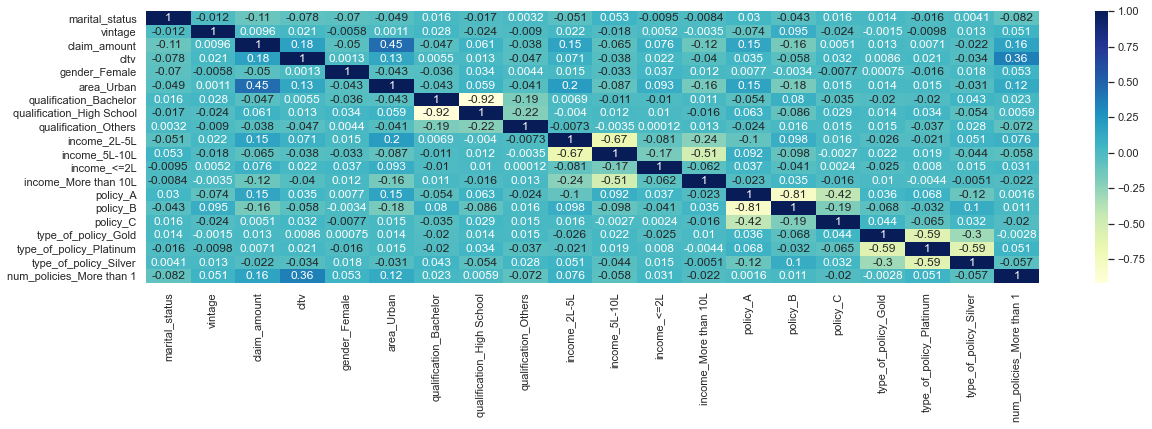

In [14]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
sns.heatmap(one_hot_encoded_train_data.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [15]:
one_hot_encoded_train_data.columns = ['marital_status', 'vintage', 'claim_amount', 'cltv',
       'gender_Female', 'area_Urban', 'qualification_Bachelor',
       'qualification_High_School', 'qualification_Others', 'income_between2and5L',
       'income_between5and10L', 'income_lessThan2L', 'income_More_than_10L', 'policy_A',
       'policy_B', 'policy_C', 'type_of_policy_Gold',
       'type_of_policy_Platinum', 'type_of_policy_Silver', 'num_policies_More_than_1']
one_hot_encoded_train_data.columns

Index(['marital_status', 'vintage', 'claim_amount', 'cltv', 'gender_Female',
       'area_Urban', 'qualification_Bachelor', 'qualification_High_School',
       'qualification_Others', 'income_between2and5L', 'income_between5and10L',
       'income_lessThan2L', 'income_More_than_10L', 'policy_A', 'policy_B',
       'policy_C', 'type_of_policy_Gold', 'type_of_policy_Platinum',
       'type_of_policy_Silver', 'num_policies_More_than_1'],
      dtype='object')

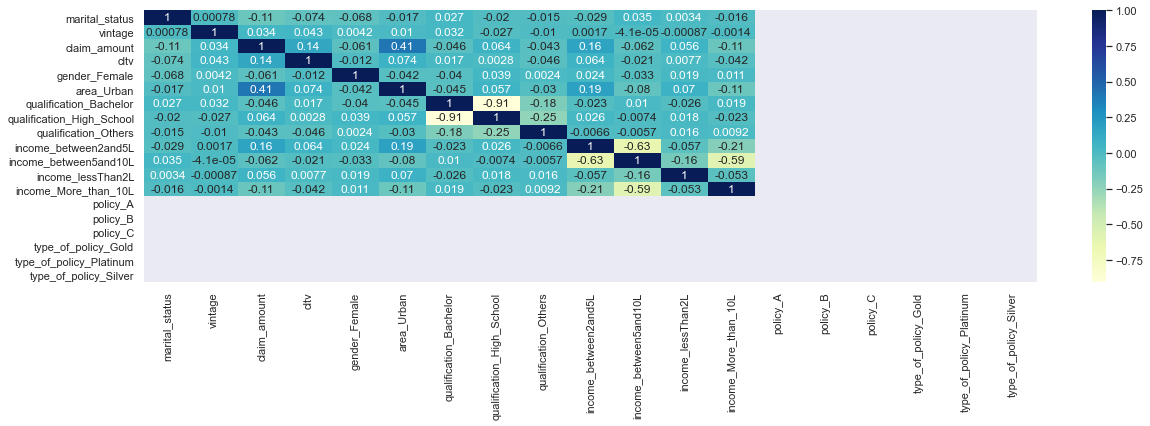

In [16]:
hot_train_data_with_Gold_Policy_A = one_hot_encoded_train_data.loc[one_hot_encoded_train_data.type_of_policy_Gold==1]\
                                    .loc[one_hot_encoded_train_data.policy_A==1]
hot_train_data_with_Gold_Policy_A.num_policies_More_than_1 = hot_train_data_with_Gold_Policy_A.num_policies_More_than_1.astype('category')
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
sns.heatmap(hot_train_data_with_Gold_Policy_A.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [17]:
train_data[['policy', 'type_of_policy', 'qualification']].value_counts()

policy  type_of_policy  qualification
A       Platinum        High School      17436
                        Bachelor         13244
        Gold            High School       7498
B       Platinum        Bachelor          6084
                        High School       6007
A       Silver          High School       5723
        Gold            Bachelor          5551
        Silver          Bachelor          5024
B       Silver          Bachelor          4185
                        High School       2823
        Gold            High School       2196
                        Bachelor          2177
C       Platinum        High School       2047
                        Bachelor          1306
        Silver          High School       1296
        Gold            High School       1221
A       Platinum        Others            1066
C       Gold            Bachelor           964
        Silver          Bachelor           864
A       Gold            Others             655
B       Silver        

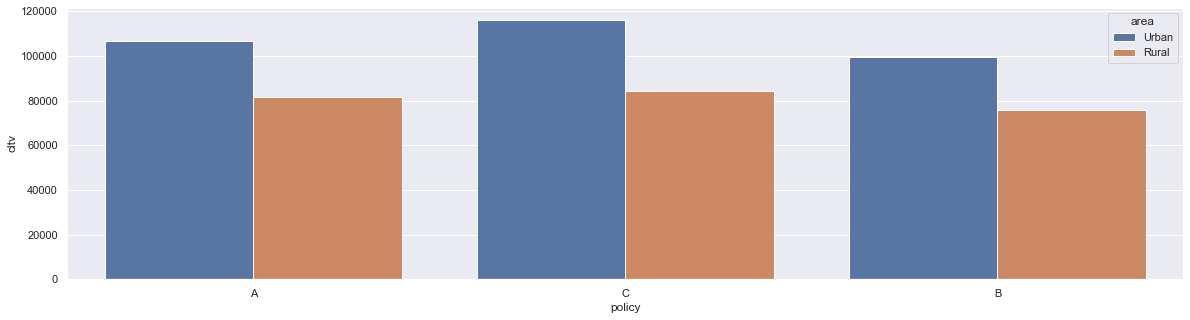

In [18]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
sns.barplot(x='policy', y='cltv', data= train_data, hue= 'area', ci=None)
plt.show()

20
Index(['marital_status', 'vintage', 'claim_amount', 'cltv', 'gender_Female',
       'area_Urban', 'qualification_Bachelor', 'qualification_High_School',
       'qualification_Others', 'income_between2and5L', 'income_between5and10L',
       'income_lessThan2L', 'income_More_than_10L', 'policy_A', 'policy_B',
       'policy_C', 'type_of_policy_Gold', 'type_of_policy_Platinum',
       'type_of_policy_Silver', 'num_policies_More_than_1'],
      dtype='object')


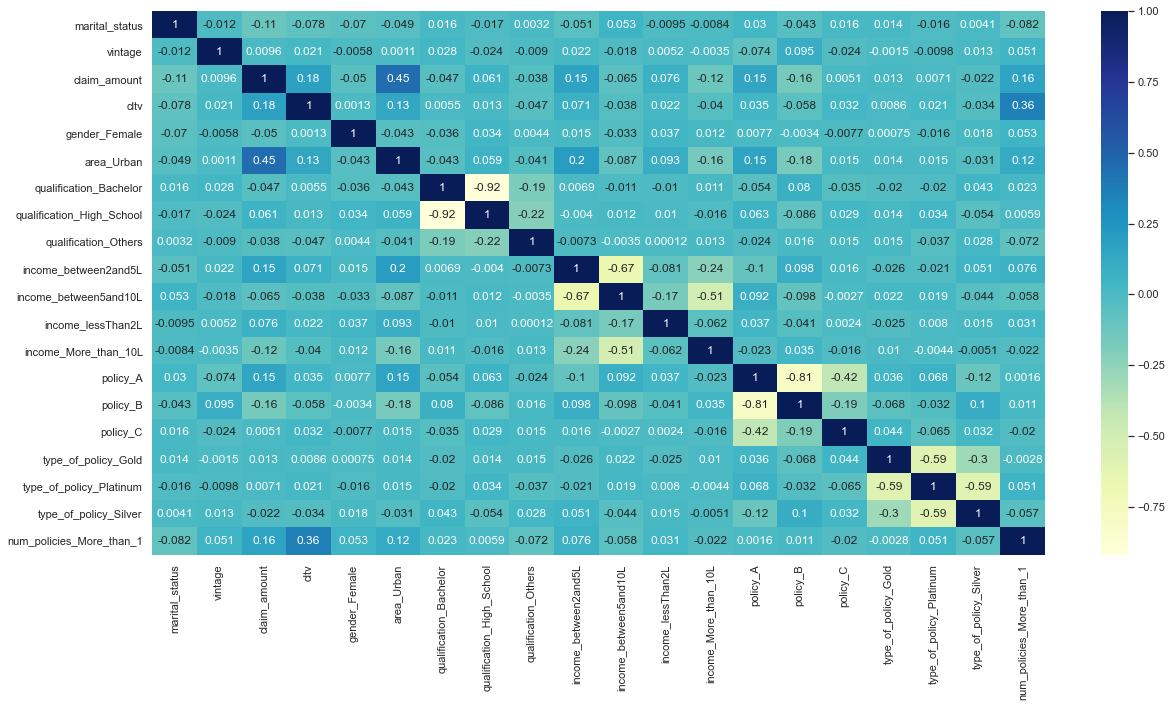

In [19]:
X = one_hot_encoded_train_data.copy()
Y = X['cltv'].copy()
print(len(X.columns))
print(X.columns)
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [20]:
numeric = ['vintage']
sc=StandardScaler()
X[['vintage']] = sc.fit_transform(X[['vintage']])

In [21]:
X.drop(columns=['cltv'], axis=1, inplace=True)

In [22]:

X_new = SelectKBest(f_regression, k=1).fit_transform(X, Y)

Y = Y.values
X = X_new


X_train, X_test,y_train, y_test = train_test_split(X_new,Y ,\
                                   random_state=40, 
                                   test_size=0.25, 
                                   shuffle=True)

In [23]:
#Linear Regression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
ypred = regressor.predict(X_test)
print(f'''Linear Regression evaluation metrics:: r2-Score: {r2_score(y_test, ypred)}, MAE: {mean_absolute_error(y_test, ypred)} 
 and RMSE: {np.sqrt(mean_squared_error(y_test, ypred))}''')
#r2_score(y_test, ypred), mean_absolute_error(y_test, ypred), np.sqrt(mean_squared_error(y_test, ypred))

Linear Regression evaluation metrics:: r2-Score: 0.12527251755965163, MAE: 52192.84436224761 
 and RMSE: 85489.62413524931


In [24]:
#Decision Tree
regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)
ypred = regressor.predict(X_test)
print(f'''Decision Tree Regression evaluation metrics:: r2-Score: {r2_score(y_test, ypred)}, MAE: {mean_absolute_error(y_test, ypred)} 
 and RMSE: {np.sqrt(mean_squared_error(y_test, ypred))}''')

Decision Tree Regression evaluation metrics:: r2-Score: 0.12527251755965163, MAE: 52192.84436224763 
 and RMSE: 85489.62413524931


In [25]:
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)
ypred = regressor.predict(X_test)
print(f'''Random Forest Regression evaluation metrics:: r2-Score: {r2_score(y_test, ypred)}, MAE: {mean_absolute_error(y_test, ypred)} 
 and RMSE: {np.sqrt(mean_squared_error(y_test, ypred))}''')

Random Forest Regression evaluation metrics:: r2-Score: 0.12527190550263945, MAE: 52187.686821352174 
 and RMSE: 85489.65404428716
